<a href="https://colab.research.google.com/github/KeshiniyMogan/BIOINFORMATICS_MODELING_AND_SIMULATION/blob/main/%5B1_April_2024%5D_Heart_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/drive')
### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = '/content/drive/My Drive/BioMS/'
model_loc = '/content/gdrive/My Drive/BioMs/heart.csv'

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['heart.csv', '[1_April_2024]_Heart_Disease_NN.ipynb']


In [4]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [5]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [6]:
df= pd.DataFrame(data)
print (df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [7]:
print("\nFormat of data: ",type(df))
print("\nData type for each column:\n",df.dtypes)


Format of data:  <class 'pandas.core.frame.DataFrame'>

Data type for each column:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


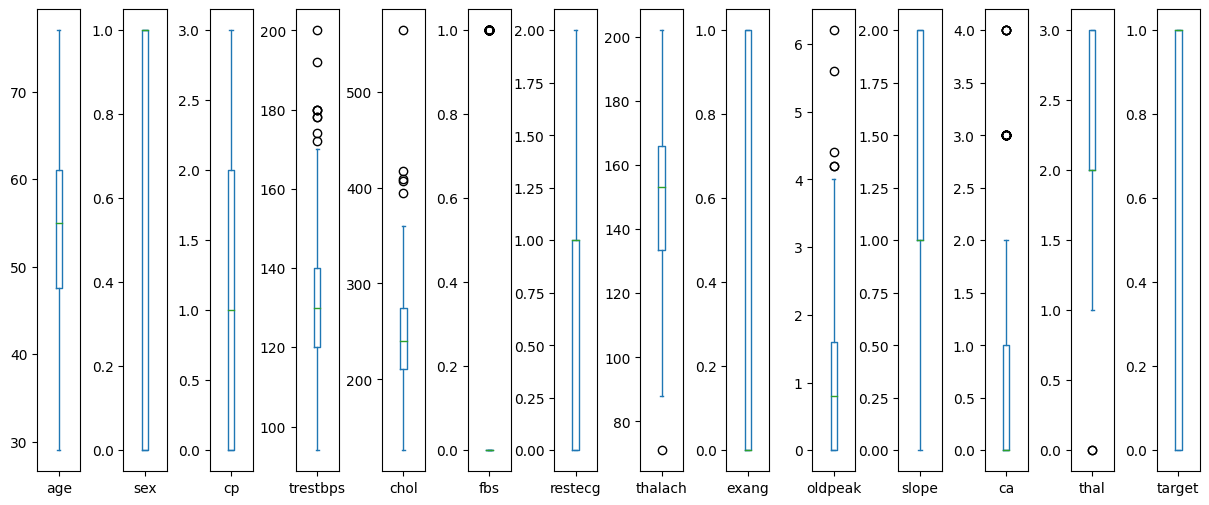

In [9]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 6)
)

plt.subplots_adjust(wspace=1)
plt.show()

Outliers from IQR method:  [172, 174, 178, 178, 180, 180, 180, 192, 200]
Median:  130.0


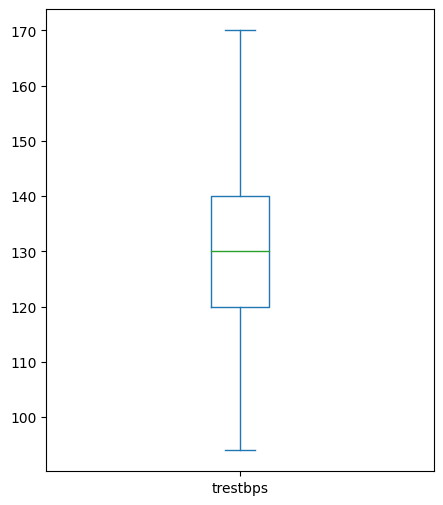

In [10]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df['trestbps'])
print("Outliers from IQR method: ", sample_outliers)

median = np.median(df['trestbps'])
print("Median: ",median)

for i in sample_outliers:
    df['trestbps'] = np.where(df['trestbps']==i, median, df['trestbps'])

df['trestbps'].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(5, 6))
plt.show()

Outliers from IQR method:  [394, 407, 409, 417, 564]
Median:  240.0


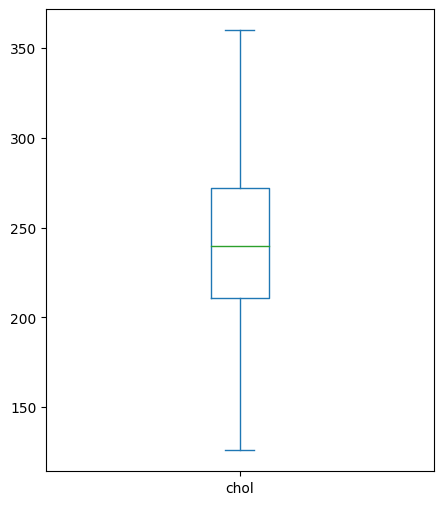

In [11]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df['chol'])
print("Outliers from IQR method: ", sample_outliers)

median = np.median(df['chol'])
print("Median: ",median)

for i in sample_outliers:
    df['chol'] = np.where(df['chol']==i, median, df['chol'])

df['chol'].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(5, 6))
plt.show()

Outliers from IQR method:  [4.2, 4.2, 4.4, 5.6, 6.2]
Median:  0.8


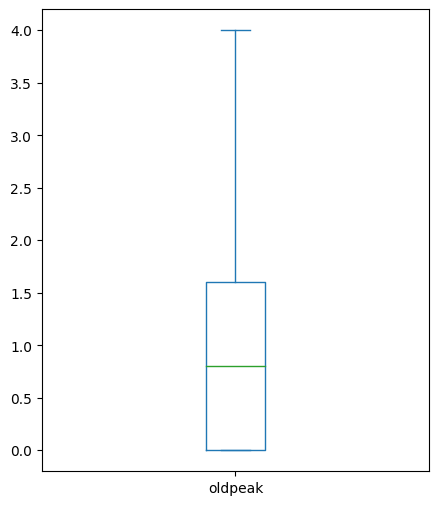

In [12]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df['oldpeak'])
print("Outliers from IQR method: ", sample_outliers)

median = np.median(df['oldpeak'])
print("Median: ",median)

for i in sample_outliers:
    df['oldpeak'] = np.where(df['oldpeak']==i, median, df['oldpeak'])

df['oldpeak'].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(5, 6))
plt.show()

Outliers from IQR method:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
Median:  0.0


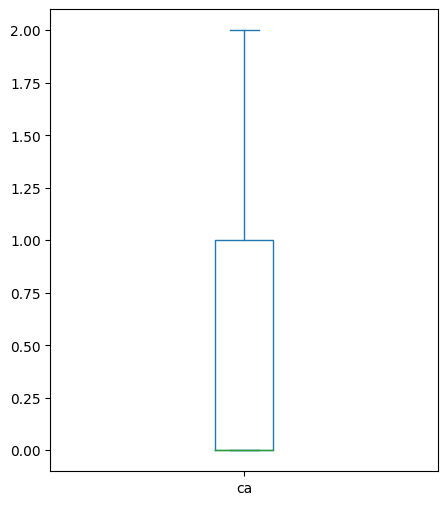

In [13]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_iqr(df['ca'])
print("Outliers from IQR method: ", sample_outliers)

median = np.median(df['ca'])
print("Median: ",median)

for i in sample_outliers:
    df['ca'] = np.where(df['ca']==i, median, df['ca'])

df['ca'].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(5, 6))
plt.show()

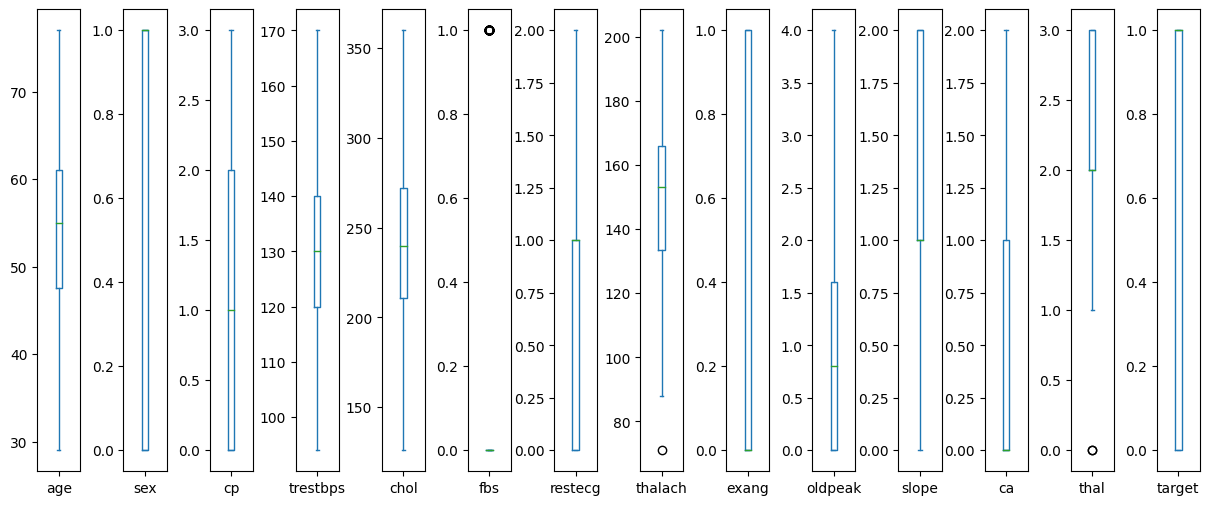

In [14]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 6)
)

plt.subplots_adjust(wspace=1)
plt.show()


In [15]:
print("Oldpeak before Data Normalization: ")
print(df['oldpeak'])

Oldpeak before Data Normalization: 
0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64


In [16]:
from sklearn import preprocessing
print("Oldpeak after Data Normalization: ")
df['oldpeak'] = preprocessing.MinMaxScaler().fit_transform(np.array(df['oldpeak']).reshape(-1,1))
print(df['oldpeak'])

Oldpeak after Data Normalization: 
0      0.575
1      0.875
2      0.350
3      0.200
4      0.150
       ...  
298    0.050
299    0.300
300    0.850
301    0.300
302    0.000
Name: oldpeak, Length: 303, dtype: float64


In [17]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?
catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

To let Python know that certain variables are categorical rather than numerical, especially when using Pandas.

In [18]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.DataFrame(data)
catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']

indicator_variables = pd.get_dummies(data[catagorialList])

data_with_indicators = pd.concat([data, indicator_variables], axis=1)

data_with_indicators.drop(catagorialList, axis=1, inplace=True)

print(data_with_indicators)

     age  trestbps   chol  thalach  oldpeak  slope  target  sex_0  sex_1  \
0     63     145.0  233.0      150    0.575      0       1      0      1   
1     37     130.0  250.0      187    0.875      0       1      0      1   
2     41     130.0  204.0      172    0.350      2       1      1      0   
3     56     120.0  236.0      178    0.200      2       1      0      1   
4     57     120.0  354.0      163    0.150      2       1      1      0   
..   ...       ...    ...      ...      ...    ...     ...    ...    ...   
298   57     140.0  241.0      123    0.050      1       0      1      0   
299   45     110.0  264.0      132    0.300      1       0      0      1   
300   68     144.0  193.0      141    0.850      1       0      0      1   
301   57     130.0  131.0      115    0.300      1       0      0      1   
302   57     130.0  236.0      174    0.000      1       0      1      0   

     cp_0  ...  restecg_2  exang_0  exang_1  ca_0.0  ca_1.0  ca_2.0  thal_0  \
0       

<ipython-input-18-59d80ad8da6c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  indicator_variables = pd.get_dummies(data[catagorialList])
<ipython-input-18-59d80ad8da6c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  indicator_variables = pd.get_dummies(data[catagorialList])
<ipython-input-18-59d80ad8da6c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  indicator_variables = pd.get_dummies(data[catagorialList])
<ipython-input-18-59d80ad8da6c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  indicator_variables = pd.get_dummies(data[catagorialList])
<ipython-input-1

In [19]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
##

Shape of x: (303, 13)
Shape of y: (303, 1)


Line 3 is EDA process which is a part of preprocessing where we can able to view all data, understand the data, able to visualize them, replace missing values, remove outliers to smooth data and many more.
Line 4 is to let know the Python that some data are categorical.
Line 5 is to convert categorical variables into indicator variables.

In [20]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

data = pd.DataFrame({
    'MaxHR': [172, 156, 98, 108, 122],
    'RestingBP': [140, 160, 130, 138, 150]
})
print("MaxHR and RestingBP before Data Normalization: ")
print(data)
print("MaxHR and RestingBP after Data Normalization: ")
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

normalized_data = normalize(data)
print(normalized_data)

MaxHR and RestingBP before Data Normalization: 
   MaxHR  RestingBP
0    172        140
1    156        160
2     98        130
3    108        138
4    122        150
MaxHR and RestingBP after Data Normalization: 
      MaxHR  RestingBP
0  1.000000   0.333333
1  0.783784   1.000000
2  0.000000   0.000000
3  0.135135   0.266667
4  0.324324   0.666667


In [21]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.671053,0.457265,1.0,0.0,0.603053,0.0,0.575,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.473684,0.529915,0.0,0.5,0.885496,0.0,0.875,0.0,0.0,0.666667
2,0.25,0.0,0.333333,0.473684,0.333333,0.0,0.0,0.770992,0.0,0.35,1.0,0.0,0.666667
3,0.5625,1.0,0.333333,0.342105,0.470085,0.0,0.5,0.816794,0.0,0.2,1.0,0.0,0.666667
4,0.583333,0.0,0.0,0.342105,0.974359,0.0,0.5,0.70229,1.0,0.15,1.0,0.0,0.666667


The dataset has set to the range from 0 to 1.

In [22]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(244, 13)
(28, 13)
(31, 13)


In [23]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=28, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3969 (15.50 KB)
Trainable params: 3969 (15.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The input layer will recive input data and transfer it to hidden layers. Hidden Layers will process the inputs received from the previous layer and applies a weighted sum followed by an activation function. Softmax activation transforms the raw output scores of the neurons into probabilities, ensuring that the output values sum up to 1. Meanwhile, sigmoid activation squashes the raw output scores of the neurons into the range 0 to 1.The output layer(1 neuron) is responsible for producing the final output of the neural network.

In [24]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

loss='mse'-evaluates the level to which the model's predictions during training match the actual target values.

In order to minimize the loss function, the optimizer modifies the model's parameters (weights and biases) during training.

Metrics are used to evaluate the performance of the model during training and testing(it uses accuracy,acc)



In [27]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).

In [ ]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

In [ ]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.


In [ ]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

In [ ]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

In [ ]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

Confusion Matrix describe the performance of a classification model.

True Positive (TP) - correctly predicts the positive class as positive. In other words, the model predicts a positive outcome, and the actual outcome is also positive.

False Positive (FP)- incorrectly predicts the positive class when it is actually negative. In other words, the model predicts a positive outcome, but the actual outcome is negative.

False Negative (FN)- incorrectly predicts the negative class when it is actually positive. In other words, the model predicts a negative outcome, but the actual outcome is positive.

True Negative (TN)- correctly predicts the negative class as negative. In other words, the model predicts a negative outcome, and the actual outcome is also negative.